Grouping customers based on their purchasing behavior and demographics to target marketing strategies effectively.

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [72]:
import warnings
warnings.filterwarnings('ignore')

In [73]:
df = pd.read_csv('Mall_Customers.csv')

In [74]:
df.shape

(200, 5)

In [75]:
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [76]:
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [78]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [79]:
ages=df['Age']
maximum_age=np.max(ages)
minimum_age=np.min(ages)
print("Maximum age: ",maximum_age)
print("Minimum age: ",minimum_age)

Maximum age:  70
Minimum age:  18


In [80]:
annual_income=df['Annual Income (k$)']
maximum_annual_income=np.max(annual_income)
minimum_annual_income=np.min(annual_income)
print("Maximum Annual Income (k$): ",maximum_annual_income)
print("Minimum Anual Income (k$): ",minimum_annual_income)

Maximum Annual Income (k$):  137
Minimum Anual Income (k$):  15


In [106]:
gender_counts = df['Gender'].value_counts()
gender_labels = ['Male', 'Female'] if le.classes_[0] == 'Female' else ['Female', 'Male']

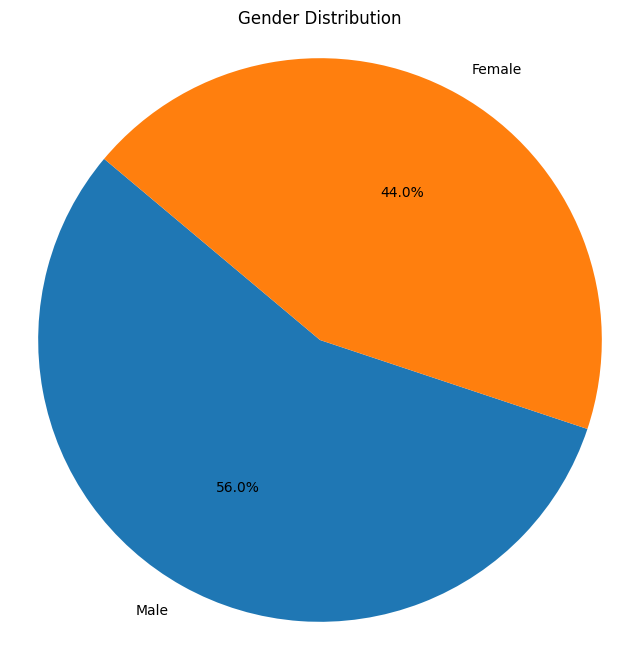

In [107]:
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_labels, autopct='%1.1f%%', startangle=140, colors=['#1f77b4', '#ff7f0e'])
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

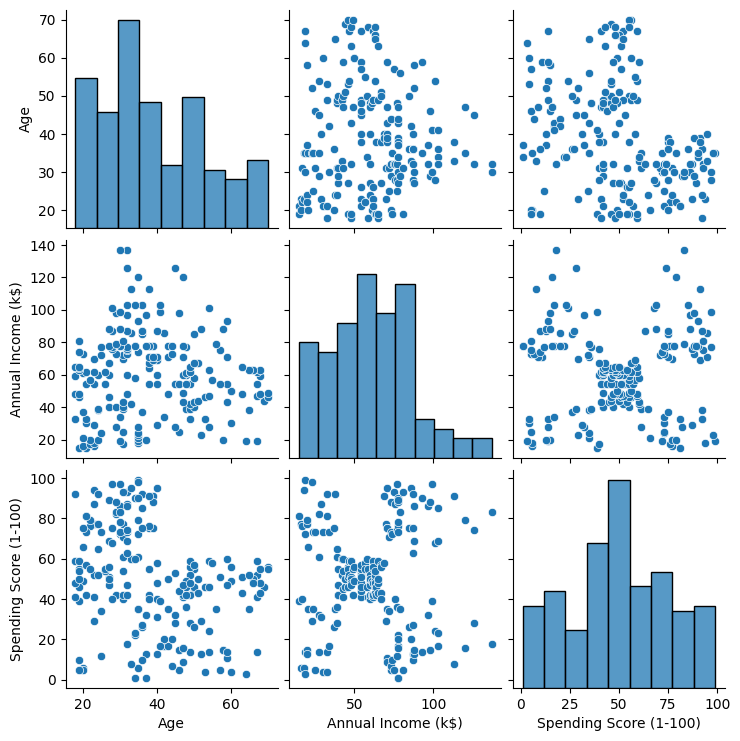

In [81]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

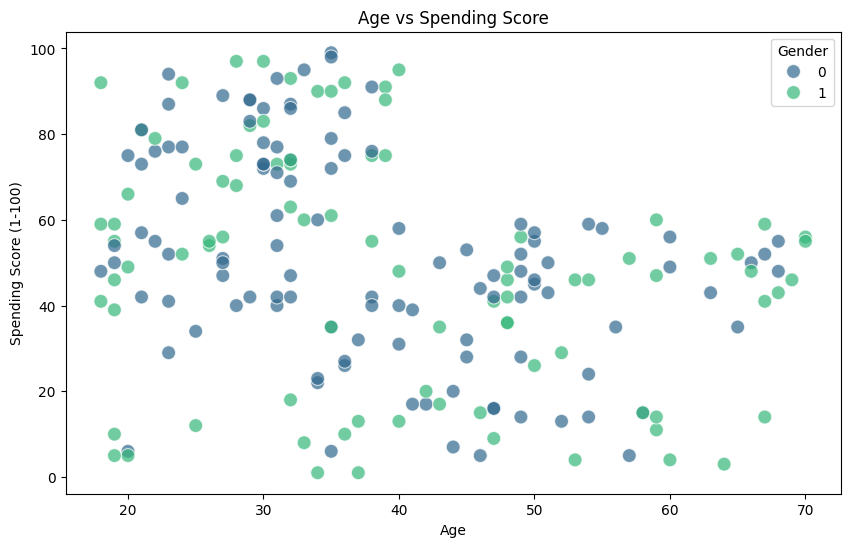

In [82]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Gender', palette='viridis', s=100, alpha=0.7)
plt.title('Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Gender')
plt.show()

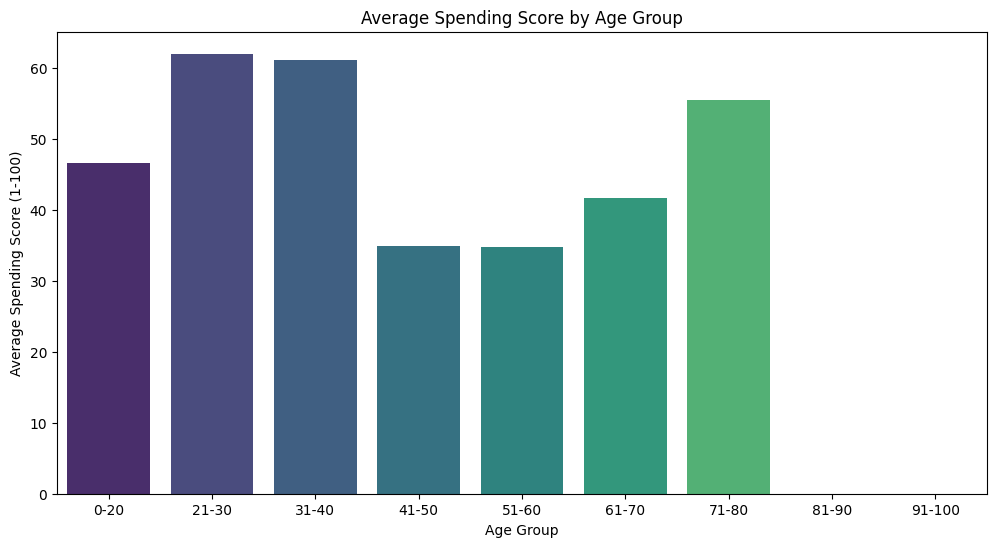

In [83]:
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

age_group_avg_spending = df.groupby('Age Group')['Spending Score (1-100)'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Age Group', y='Spending Score (1-100)', data=age_group_avg_spending, palette='viridis')
plt.title('Average Spending Score by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Spending Score (1-100)')
plt.show()

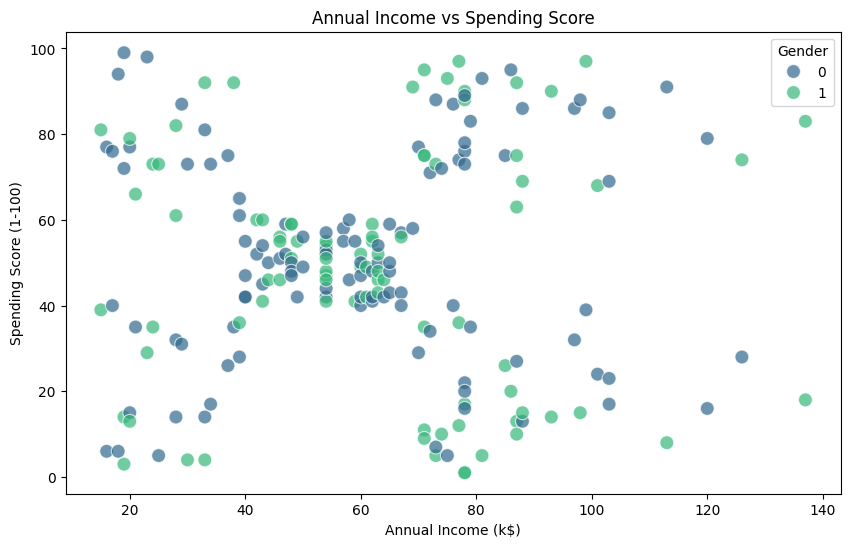

In [84]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', palette='viridis', s=100, alpha=0.7)
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Gender')
plt.show()

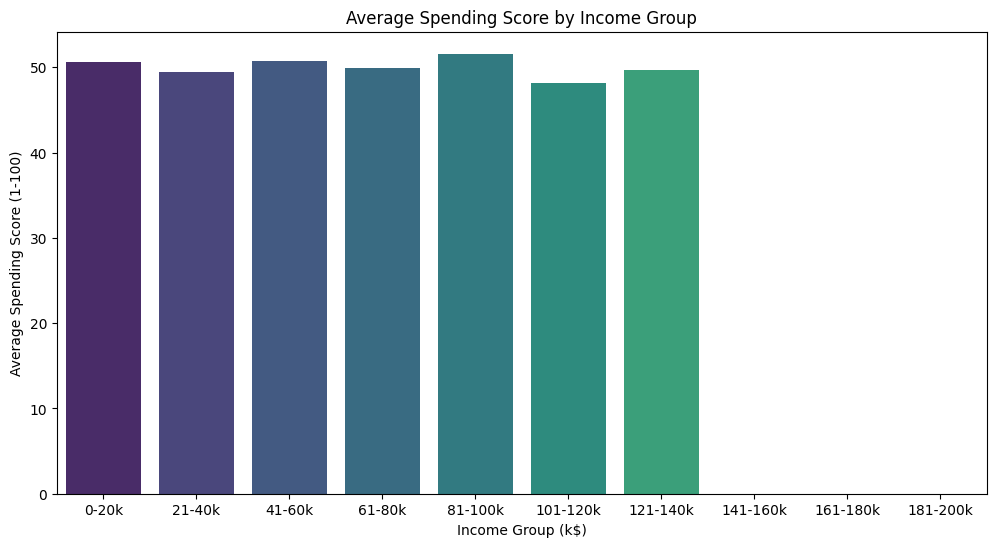

In [85]:
bins = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]
labels = ['0-20k', '21-40k', '41-60k', '61-80k', '81-100k', '101-120k', '121-140k', '141-160k', '161-180k', '181-200k']
df['Income Group'] = pd.cut(df['Annual Income (k$)'], bins=bins, labels=labels, right=False)

income_group_avg_spending = df.groupby('Income Group')['Spending Score (1-100)'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Income Group', y='Spending Score (1-100)', data=income_group_avg_spending, palette='viridis')
plt.title('Average Spending Score by Income Group')
plt.xlabel('Income Group (k$)')
plt.ylabel('Average Spending Score (1-100)')
plt.show()

In [87]:
scaler = StandardScaler()
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

In [88]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
    sse.append(kmeans.inertia_)

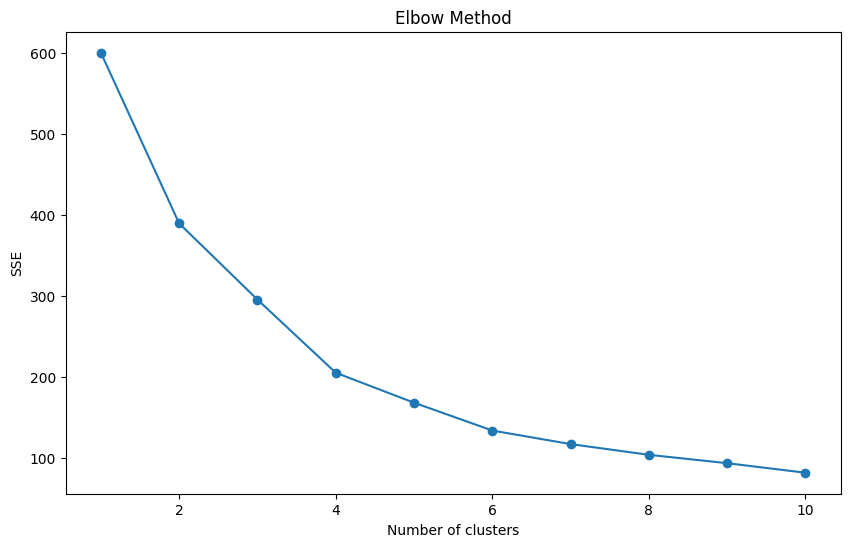

In [89]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [90]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
    silhouette_scores.append(silhouette_score(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], labels))

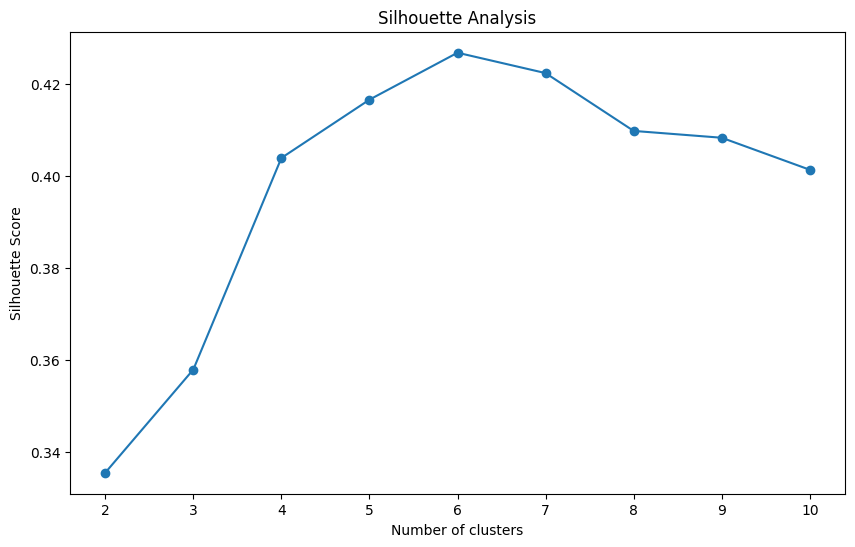

In [91]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [92]:
kmeans = KMeans(n_clusters=5, random_state=0)
df['Cluster'] = kmeans.fit_predict(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

In [94]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove('CustomerID')
print(df.groupby('Cluster')[numeric_columns].mean())

           Gender       Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                   
0        0.512821  0.073331            0.974945               -1.197297   
1        0.425532  1.204841           -0.235773               -0.052368   
2        0.407407 -0.980679           -0.743060                0.467440   
3        0.400000  0.531074           -1.290508               -1.236467   
4        0.450000 -0.428806            0.974847                1.216085   

         Cluster  
Cluster           
0            0.0  
1            1.0  
2            2.0  
3            3.0  
4            4.0  


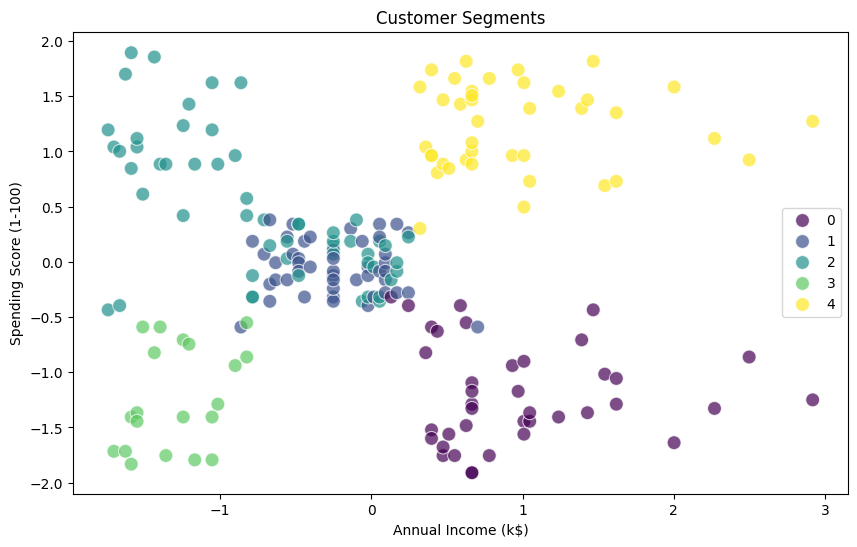

In [95]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [102]:
output_df = df[['CustomerID', 'Cluster']]
output_file = 'customer_segments.csv'
output_df.to_csv(output_file, index=False)

In [103]:
output_df = pd.read_csv('customer_segments.csv')
print(output_df)

     CustomerID  Cluster
0             1        2
1             2        2
2             3        3
3             4        2
4             5        2
..          ...      ...
195         196        4
196         197        0
197         198        4
198         199        0
199         200        4

[200 rows x 2 columns]
